IMPORTING NECESSARY PYTHON LIBRARIES

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import whiten

In [12]:
path = "C:\\Users\\HP\\Downloads\\ML basics datasets\\seeds.csv"
bike = pd.read_csv(path)
#READING THE CSV FILE USING THE PANDAS LIBRARY
bike.head(10)
features = bike[bike.columns[0:6]]
#SLICING THE KEY COLUMNS NEEDED FOR THE CLUSTERING

In [13]:

for column in features.columns:
    # Creating a new column with scaled values, and use f-strings to generate column names
    features[f"scaled_{column}"] = whiten(features[column])

features.head()
#displaying the first 5 rows of the new features dataframe

C:\Users\HP\AppData\Local\Temp\ipykernel_3824\20523006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f"scaled_{column}"] = whiten(features[column])


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,scaled_area,scaled_perimeter,scaled_compactness,scaled_kernel_length,scaled_kernel_width,scaled_asymmetry_coefficient
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.257060,11.390452,36.948912,13.038246,8.789481,1.480693
1,14.88,14.57,0.8811,5.554,3.333,1.018,5.126150,11.183213,37.377367,12.565403,8.845212,0.678679
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.922895,10.814789,38.391235,11.970390,8.855827,1.799366
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.767871,10.699656,37.988233,12.045050,8.967288,1.506027
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.560219,11.505584,38.323361,12.800693,9.452938,0.903350


In [14]:
scaled = features[features.columns[6:]]
#slicing only the normalized columns and assign to the scaled variable
scaled.head()


,scaled_area,scaled_perimeter,scaled_compactness,scaled_kernel_length,scaled_kernel_width,scaled_asymmetry_coefficient
0,5.257060,11.390452,36.948912,13.038246,8.789481,1.480693
1,5.126150,11.183213,37.377367,12.565403,8.845212,0.678679
2,4.922895,10.814789,38.391235,11.970390,8.855827,1.799366
3,4.767871,10.699656,37.988233,12.045050,8.967288,1.506027
4,5.560219,11.505584,38.323361,12.800693,9.452938,0.903350


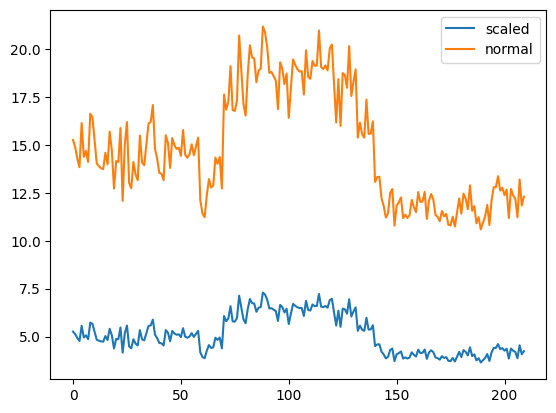

In [15]:
#line plot comparing the original column and normalized column 
plt.plot(scaled["scaled_area"], label = "scaled")
plt.plot(features["area"], label = "normal")
plt.legend()
plt.show()

In [16]:
from scipy.cluster.vq import kmeans, vq

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

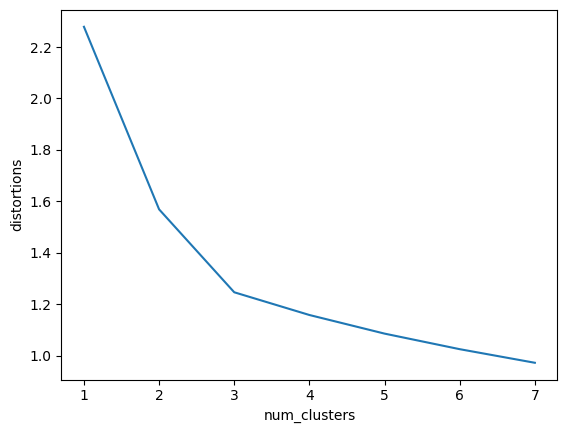

In [17]:
#initialize distortion as an empty list
distortions = []
#num_clusters to get a range of cluster values
num_clusters = range(1,8)

for i in num_clusters:
    cluster_centres, distortion = kmeans(scaled, i)
    # append the distortion value for each num_cluster
    distortions.append(distortion)

elbow_df = pd.DataFrame({"num_clusters" : num_clusters, "distortions" : distortions})

#create a line plot to determine the  most effective num_ckuster to use
sns.lineplot(x = "num_clusters", y = "distortions", data = elbow_df)
plt.show()

In [18]:
cluster_centres, distortion = kmeans(scaled, 3)


In [19]:
scaled['cluster_name'], _ = vq(scaled, cluster_centres)

C:\Users\HP\AppData\Local\Temp\ipykernel_3824\3778114820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled['cluster_name'], _ = vq(scaled, cluster_centres)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


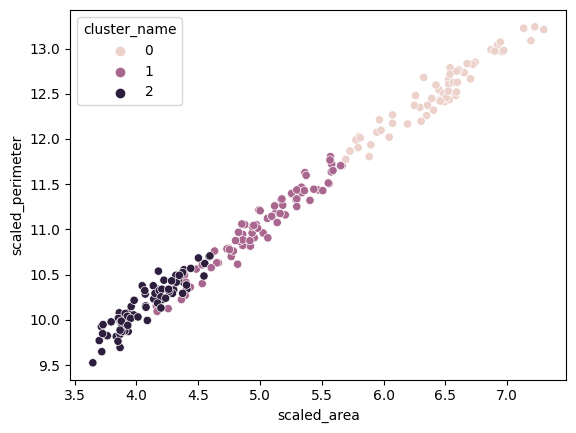

In [20]:
#Scatterplot to test the kmeans clustering algorithm 
sns.scatterplot(data = scaled, x = "scaled_area", y = "scaled_perimeter", hue = "cluster_name")
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


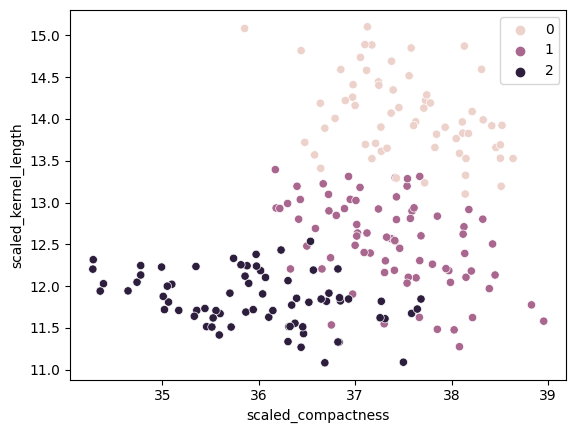

In [22]:

sns.scatterplot(data = scaled, x ="scaled_compactness",	y = "scaled_kernel_length", hue = "cluster_name" )
plt.legend()
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


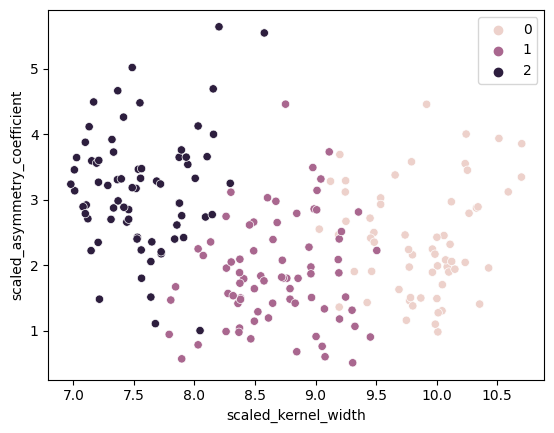

In [23]:
sns.scatterplot(data = scaled, x = "scaled_kernel_width",	y = "scaled_asymmetry_coefficient", hue = "cluster_name")
plt.legend()
plt.show()